<a href="https://colab.research.google.com/github/marcelocruzsilverio/.github/blob/main/analise_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset (substitua pelo caminho correto do arquivo CSV após o upload)
df = pd.read_csv('/content/sample_data/datatran2007-2022.csv', encoding='utf-8')
print(df.columns)


# Exibir as primeiras linhas do dataframe
print(df.head())

# Informações gerais sobre o dataframe
print(df.info())
# Verificar valores ausentes
print(df.isnull().sum())

# Tratamento de valores ausentes (exemplo)
df = df = df.fillna(df.select_dtypes(include=['number']).mean())


# Estatísticas descritivas
print(df.describe())


<ipython-input-10-1b3e8d34fb0c>:7: DtypeWarning: Columns (5,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/datatran2007-2022.csv', encoding='utf-8')


Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'ano', 'pessoas', 'mortos', 'feridos_leves',
       'feridos_graves', 'ilesos', 'ignorados', 'feridos', 'veiculos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')
  data_inversa dia_semana   horario  uf     br     km    municipio  \
0   10/11/2009      Terça  14:10:00  MG  381.0  495.0        BETIM   
1   16/10/2009      Sexta  04:35:00  MG  251.0  419.6   GRAO MOGOL   
2   20/09/2009    Domingo  20:00:00  PI  316.0   24.0     TERESINA   
3   17/05/2009    Domingo  15:45:00  RJ  101.0  429.0  MANGARATIBA   
4   05/07/2009    Domingo  17:30:00  PE  101.0   59.2       RECIFE   

            causa_acidente                               tipo_acidente  \
0  Velocidade incompatível                     

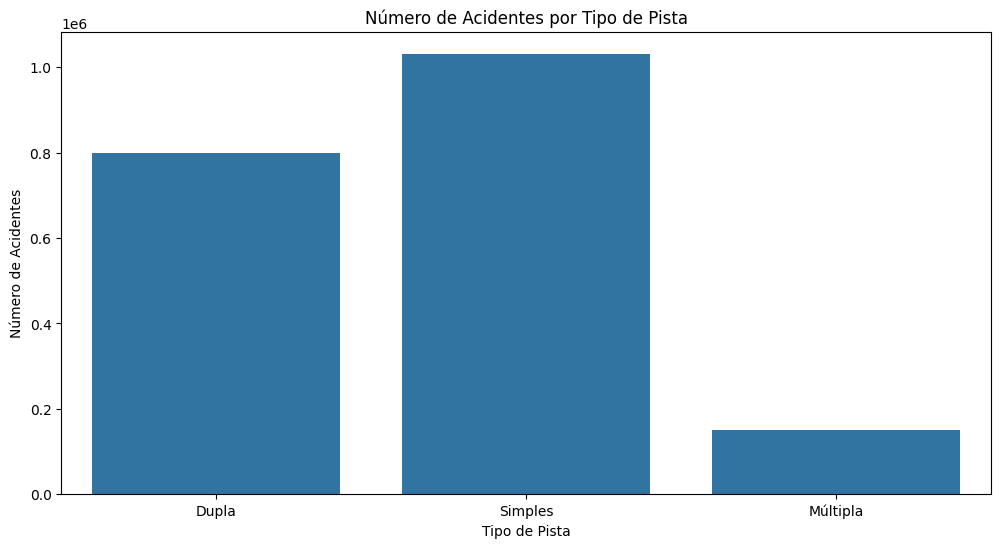

In [15]:
# 2. Hipótese: Pistas simples têm maior incidência de acidentes graves.
plt.figure(figsize=(12, 6))
sns.countplot(x='tipo_pista', data=df)
plt.title('Número de Acidentes por Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Número de Acidentes')
plt.show()

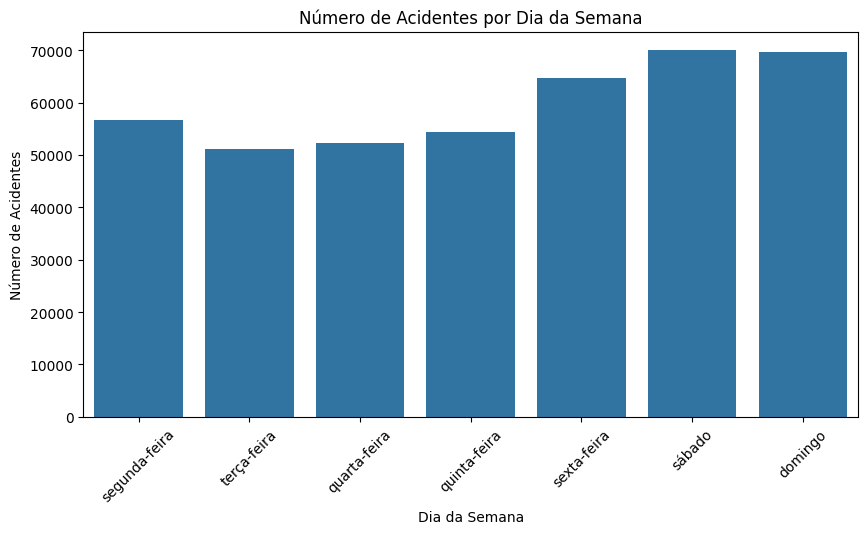

In [18]:
# Acidentes por dia da semana
# Hipótese: O número de acidentes é maior nos finais de semana devido ao aumento do consumo de álcool e maior fluxo de veículos de lazer.
plt.figure(figsize=(10, 5))
sns.countplot(x=df['dia_semana'], order=['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo'])
plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()

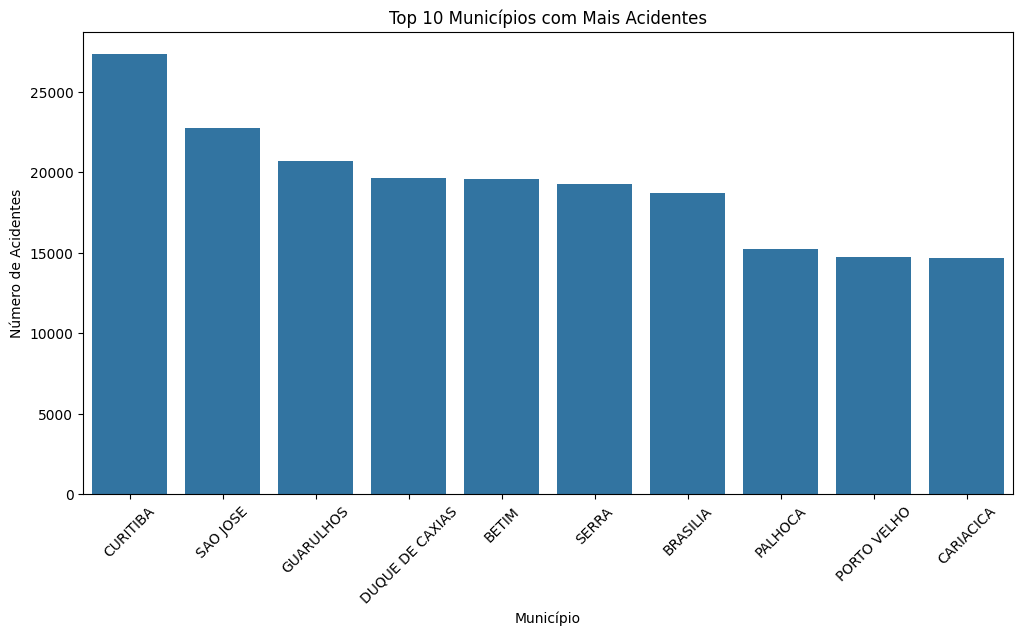

In [19]:
# Acidentes por município (top 10)
# Hipótese: Municípios com maior fluxo de veículos e rodovias movimentadas apresentam mais acidentes do que cidades menores e rurais.
plt.figure(figsize=(12, 6))
top_municipios = df['municipio'].value_counts().head(10)
sns.barplot(x=top_municipios.index, y=top_municipios.values)
plt.title('Top 10 Municípios com Mais Acidentes')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()

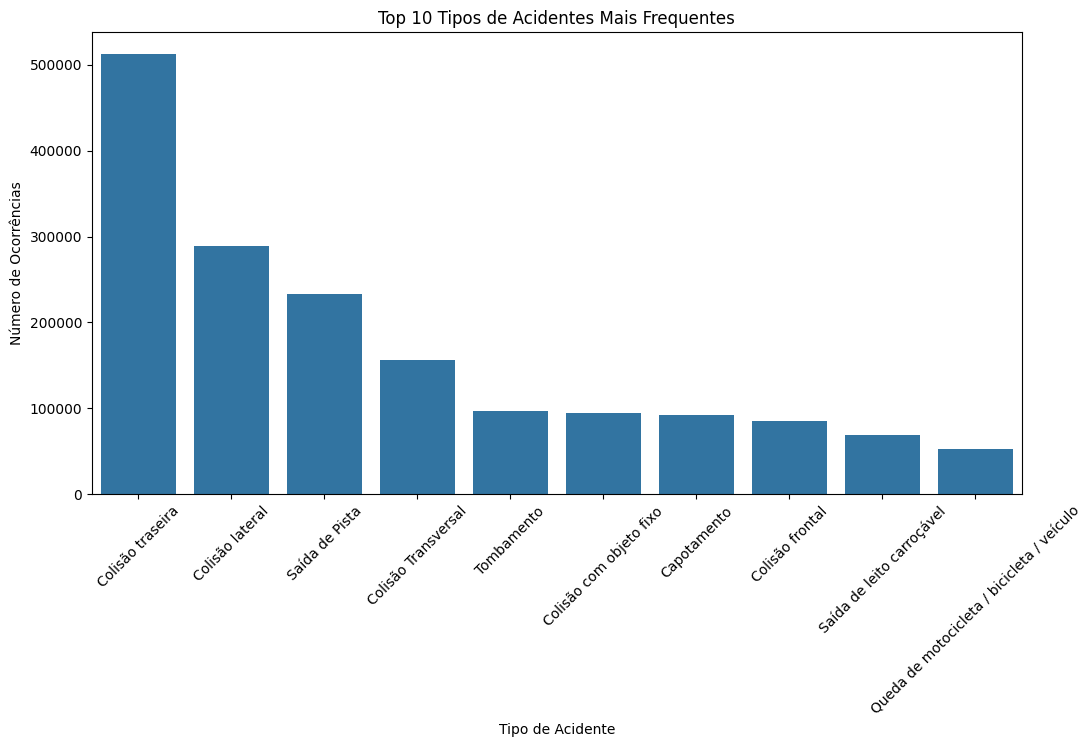

In [24]:
### Tipos de acidente mais comuns
# Hipótese: Colisões traseiras e laterais são os tipos de acidentes mais comuns devido ao congestionamento e falhas de atenção dos motoristas.
plt.figure(figsize=(12, 6))
tipo_acidente = df['tipo_acidente'].value_counts().head(10)
sns.barplot(x=tipo_acidente.index, y=tipo_acidente.values)
plt.title('Top 10 Tipos de Acidentes Mais Frequentes')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.show()

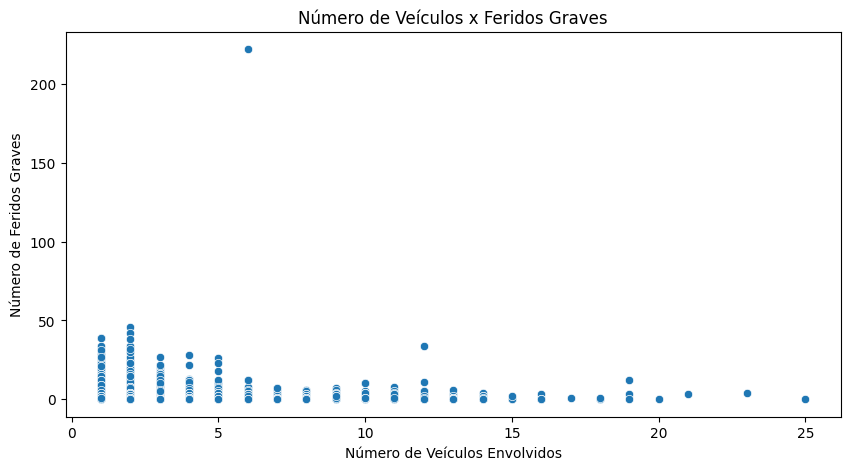

In [22]:
### Relação entre Número de Veículos e Gravidade dos Acidentes
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['veiculos'], y=df['feridos_graves'])
plt.title('Número de Veículos x Feridos Graves')
plt.xlabel('Número de Veículos Envolvidos')
plt.ylabel('Número de Feridos Graves')
plt.show()

<ipython-input-25-a8a06c7f84dc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clima_acidentes.index, y=clima_acidentes.values, palette='coolwarm')


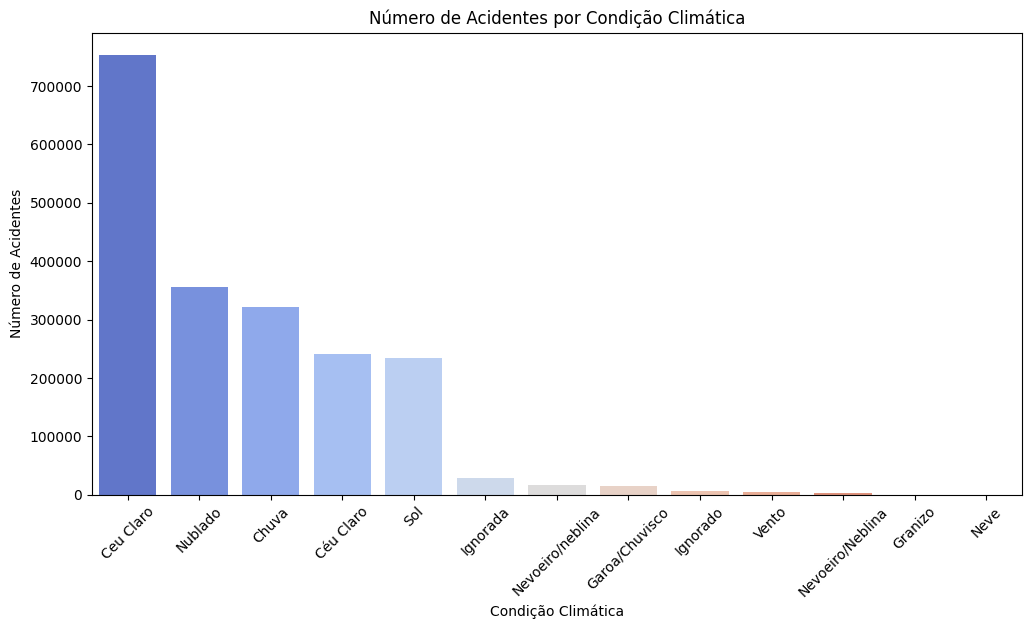

In [25]:
# Análise: Condição Meteorológica x Número de Acidentes
# Hipótese: Acidentes ocorrem com mais frequência em condições climáticas adversas, como chuva e neblina, devido à baixa visibilidade e ao menor atrito da pista.


plt.figure(figsize=(12, 6))
clima_acidentes = df['condicao_metereologica'].value_counts()
sns.barplot(x=clima_acidentes.index, y=clima_acidentes.values, palette='coolwarm')
plt.title('Número de Acidentes por Condição Climática')
plt.xlabel('Condição Climática')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()


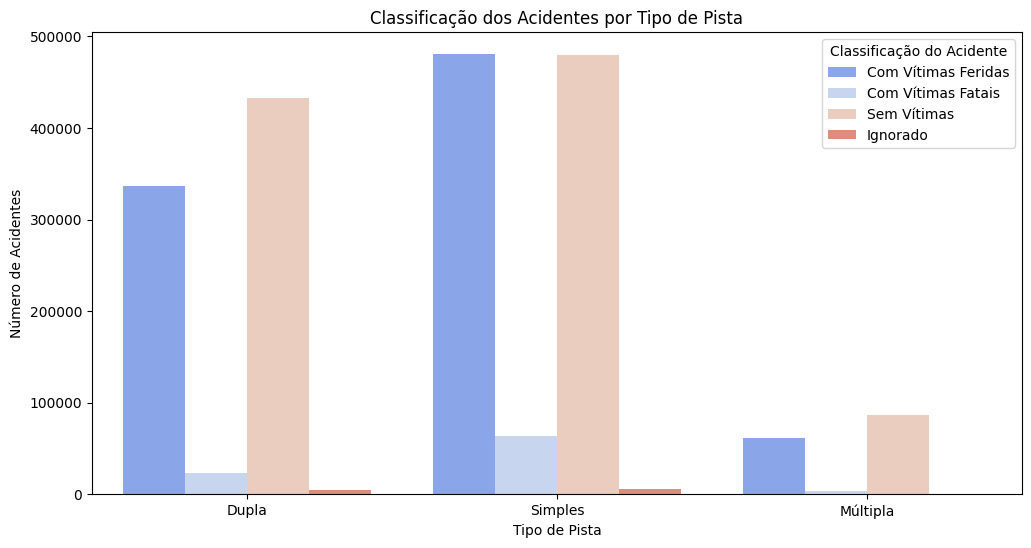

In [29]:
# Análise: Classificação dos Acidentes x Tipo de Pista
# Hipótese: Estradas de pista simples apresentam maior índice de acidentes graves do que rodovias duplicadas.


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_pista', hue='classificacao_acidente', palette='coolwarm')
plt.title('Classificação dos Acidentes por Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação do Acidente')
plt.show()


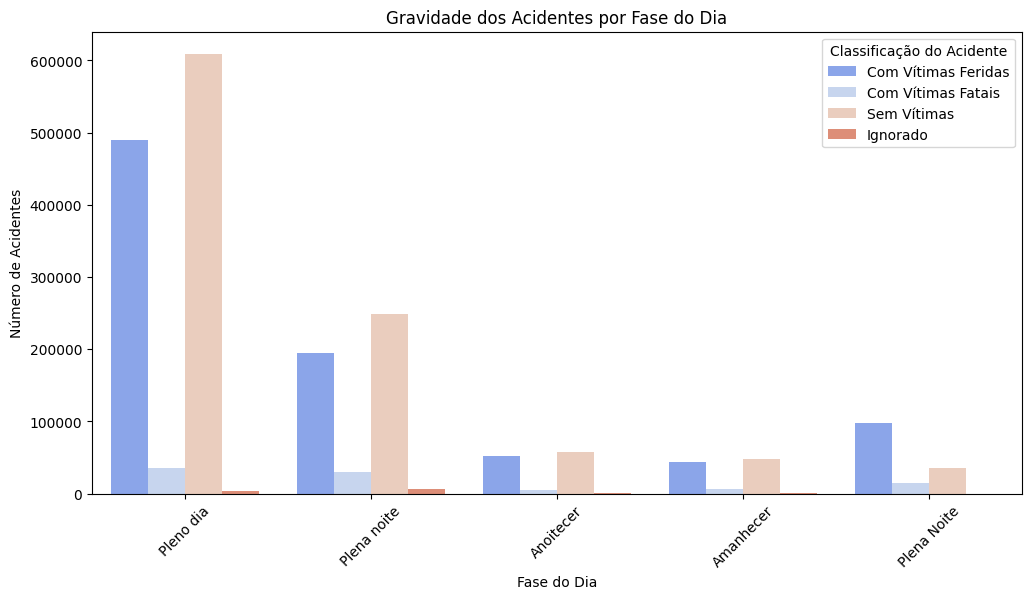

In [31]:
# Análise: Gravidade dos Acidentes x Fase do Dia
# Hipótese: Acidentes noturnos são mais graves devido à menor visibilidade e ao maior índice de motoristas alcoolizados.


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='fase_dia', hue='classificacao_acidente', palette='coolwarm')
plt.title('Gravidade dos Acidentes por Fase do Dia')
plt.xlabel('Fase do Dia')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação do Acidente')
plt.xticks(rotation=45)
plt.show()


<ipython-input-33-55624d0acf8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentido_via', palette='coolwarm')


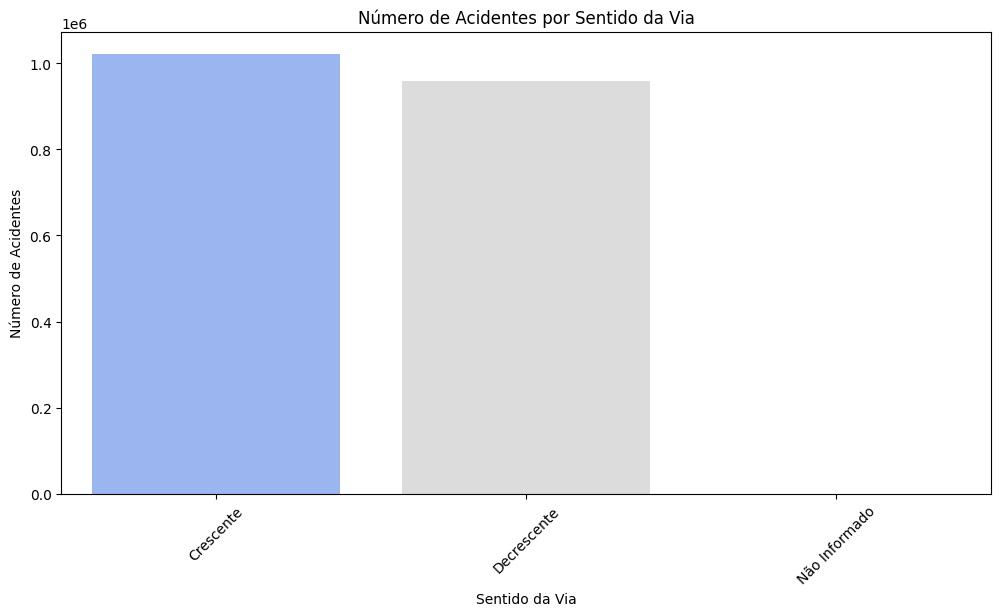

In [33]:
# Análise: Acidentes por Sentido da Via
# Hipótese: Acidentes são mais frequentes em vias de sentido duplo, pois há maior risco de colisões frontais.


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sentido_via', palette='coolwarm')
plt.title('Número de Acidentes por Sentido da Via')
plt.xlabel('Sentido da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()


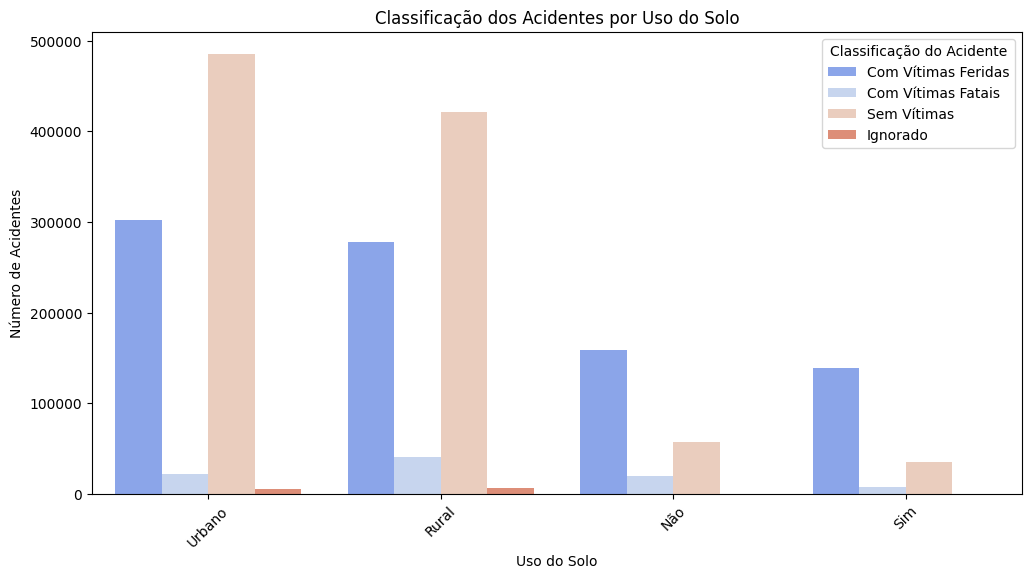

In [35]:
# Análise: Acidentes por Uso do Solo (Urbano x Rural)
# Hipótese: Acidentes urbanos são mais frequentes, mas os rurais são mais letais devido à alta velocidade.

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='uso_solo', hue='classificacao_acidente', palette='coolwarm')
plt.title('Classificação dos Acidentes por Uso do Solo')
plt.xlabel('Uso do Solo')
plt.ylabel('Número de Acidentes')
plt.legend(title='Classificação do Acidente')
plt.xticks(rotation=45)
plt.show()



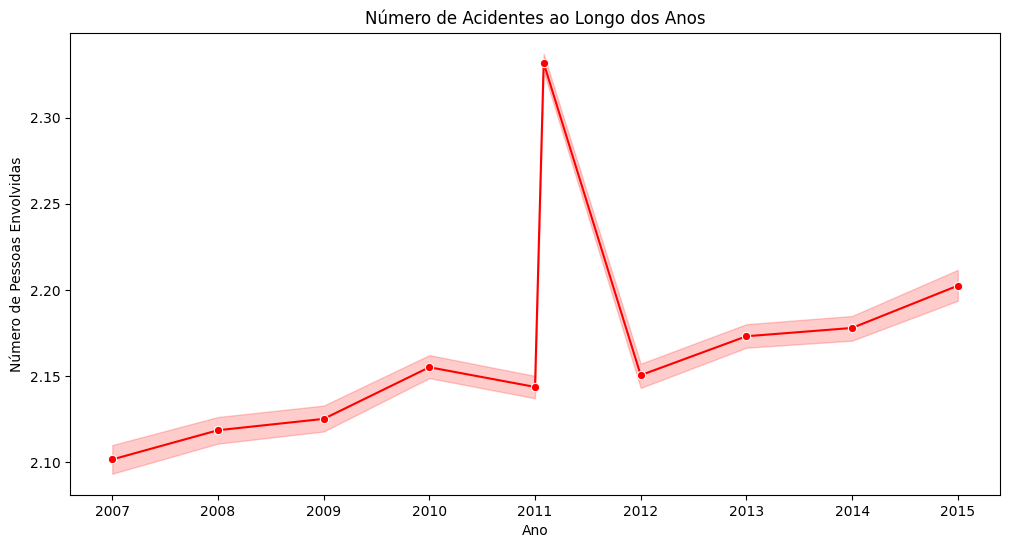

In [37]:
# Análise: Acidentes por Ano
# Hipótese: O número de acidentes pode estar aumentando ao longo dos anos devido ao aumento da frota de veículos.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ano', y=df['pessoas'], marker='o', color='r')
plt.title('Número de Acidentes ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Pessoas Envolvidas')
plt.show()


<ipython-input-38-03fe7469b5ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uf_acidentes.index, y=uf_acidentes.values, palette='coolwarm')


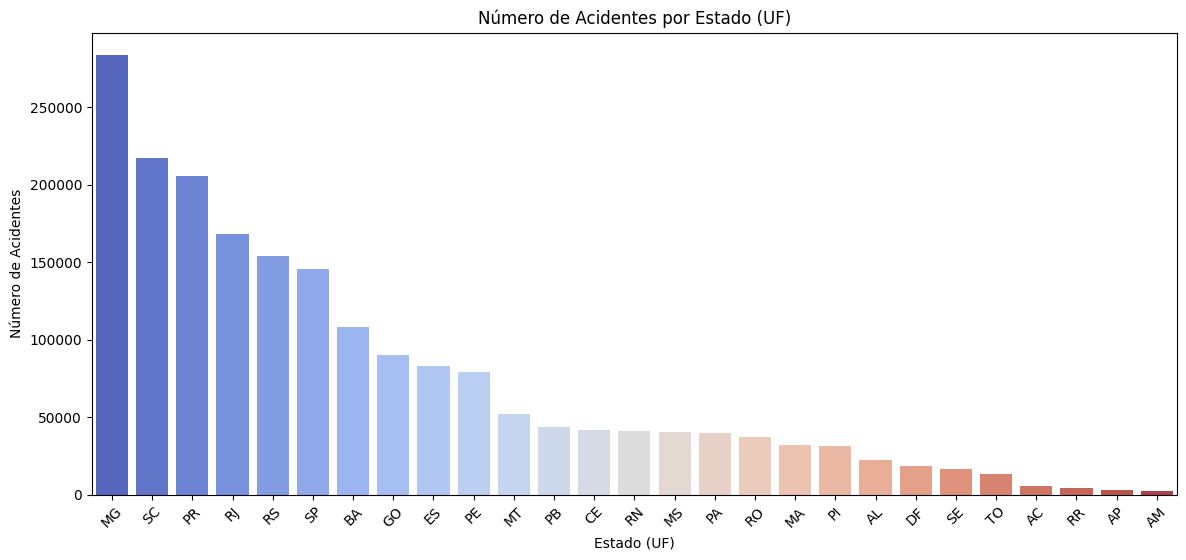

In [38]:
# Análise: Acidentes por Região (Estados - UF)
# Hipótese: Estados com maior frota e infraestrutura precária têm mais acidentes.
plt.figure(figsize=(14, 6))
uf_acidentes = df['uf'].value_counts()
sns.barplot(x=uf_acidentes.index, y=uf_acidentes.values, palette='coolwarm')
plt.title('Número de Acidentes por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()
